In [1]:
import pickle
with open('flows1.pickle','rb') as temp:
    flow = pickle.load(temp)

In [2]:
flow[4].shape

torch.Size([5, 2, 256, 256])

In [31]:
import numpy as np
from sklearn.decomposition import PCA

# flow fields for all videos
all_flow_fields = [...] # List of flow fields, where each flow field is a 2D numpy array

flows = [fl.detach().numpy() for i, fl in enumerate(flow)]
example = flow[4].detach().numpy()
print(example[:,:,0,0].shape)
ex = example[1,:,:,:]
print(ex)
# concatenate flow fields into one 2D array
X = np.concatenate(ex, axis=1)

# apply PCA with 10 components
pca = PCA(n_components=10)
pca.fit(X)

# extract the main components
components = pca.components_


(5, 2)
[[[ 0.2219913   0.2196356   0.22016568 ... -0.11870162 -0.11879127
   -0.11827517]
  [ 0.22298145  0.22022802  0.21927539 ... -0.11847363 -0.11854476
   -0.11857025]
  [ 0.22229329  0.21964376  0.21789601 ... -0.11843689 -0.11844819
   -0.11865494]
  ...
  [-0.57524407 -0.57652503 -0.57708496 ... -0.31062555 -0.31172353
   -0.31419465]
  [-0.5780835  -0.5800778  -0.5774856  ... -0.3122788  -0.31567368
   -0.31938866]
  [-0.5806232  -0.5834712  -0.57906735 ... -0.3148762  -0.32034907
   -0.3258086 ]]

 [[-0.08444576 -0.08483641 -0.08572178 ...  0.10751875  0.10680301
    0.1075604 ]
  [-0.08528524 -0.08492223 -0.08506845 ...  0.10782439  0.10740396
    0.10716447]
  [-0.08587848 -0.08515059 -0.08482878 ...  0.1080537   0.1076719
    0.10706564]
  ...
  [ 0.10988182  0.11060417  0.11093456 ...  0.32250354  0.3239221
    0.32570004]
  [ 0.11009726  0.11111697  0.11119042 ...  0.3232215   0.32532233
    0.3274299 ]
  [ 0.11141691  0.11216824  0.11179848 ...  0.3244696   0.32660508
 

In [32]:
# compute explained variances for each principal component
explained_variances = pca.explained_variance_ratio_

# print explained variances for the first 5 components
print("Explained variances for first 5 components:", explained_variances)


Explained variances for first 5 components: [0.8106022  0.09042655 0.03115568 0.0210623  0.01582368 0.00774582
 0.00536016 0.00355137 0.00295329 0.00221043]


In [39]:
import numpy as np
from sklearn.decomposition import PCA

# flow fields for all videos
all_flow_fields = [fl.detach().numpy() for i, fl in enumerate(flow)] # List of flow fields, where each flow field is a 4D numpy array of shape (n, 2, 256, 256)

# concatenate flow fields into one 2D array
X = []
for flow_fields in all_flow_fields:
    n = flow_fields.shape[0]
    X.append(flow_fields.reshape(n, -1))
X = np.concatenate(X)

# apply PCA with 10 components
pca = PCA(n_components=10)
pca.fit(X)

# extract the main components
components = pca.components_

# compute explained variances for each principal component
explained_variances = pca.explained_variance_ratio_

# print explained variances for the first 5 components
print("Explained variances for first 5 components:", explained_variances[:5])


Explained variances for first 5 components: [0.43532562 0.22425163 0.06754543 0.0384574  0.0337152 ]


In [ ]:
for i in range(10):
    ax = axes[i//5, i%5]
    size = components[i].size // (2*256*256)
    component = components[i].reshape(size, 2, 256, 256)
    U = component[:, 0, :, :]
    V = component[:, 1, :, :]
    ax.imshow(flow_to_image(U.mean(axis=0), V.mean(axis=0)))
    ax.axis('off')
plt.show()

ValueError: cannot reshape array of size 131072 into shape (5,2,256,256)

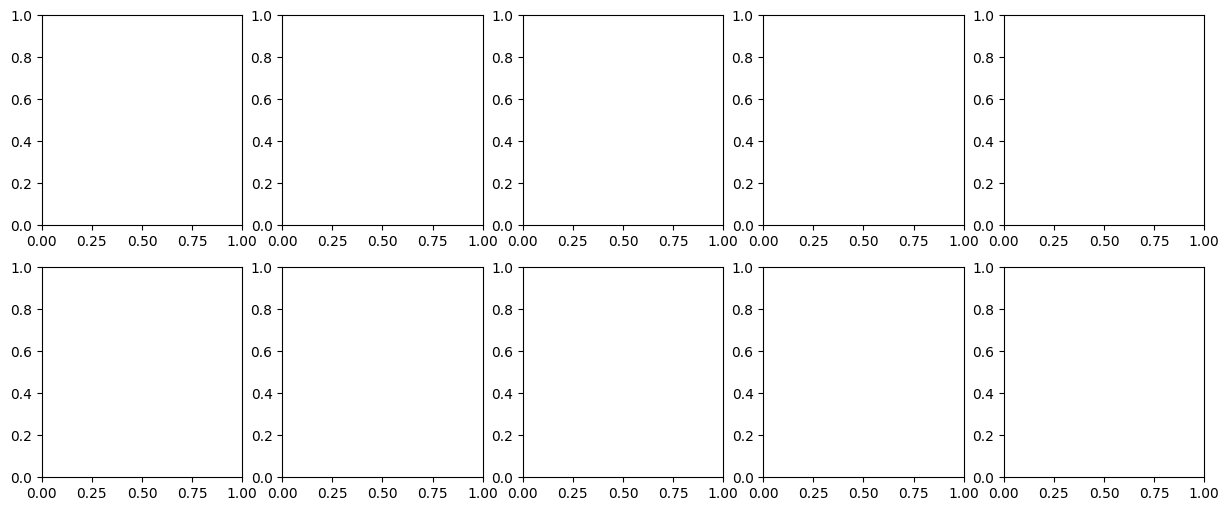

In [38]:
import matplotlib.pyplot as plt

# flow fields for all videos
all_flow_fields = [fl.detach().numpy() for i, fl in enumerate(flow)] # List of flow fields, where each flow field is a 4D numpy array of shape (n_flows, 2, 256, 256)

# reshape flow fields into a 2D array
X = []
for flow_fields in all_flow_fields:
    n_samples = flow_fields.shape[0]
    X.append(flow_fields.reshape(n_samples, -1))
X = np.concatenate(X)

# apply PCA with 10 components
pca = PCA(n_components=10)
pca.fit(X)

# extract the main components
components = pca.components_

# plot the first few principal components
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15,6))
for i in range(10):
    ax = axes[i//5, i%5]
    component = components[i].reshape(5, 2, 256, 256)
    U = component[:, 0, :, :]
    V = component[:, 1, :, :]
    ax.quiver(U.mean(axis=0), V.mean(axis=0), scale=50)
    ax.axis('off')
plt.show()

